## Check outputs .root and plot

### Import uproot and investige .root files

#### hist.root

Open hist.root with uproot 

In [2]:
import uproot

hist_path = "hist.root"   # adjust if your notebook isn't in runs/it_pileup
f = uproot.open(hist_path)

keys = [k.split(";")[0] for k in f.keys()]          # strip ROOT cycle suffix ";1"
keys = sorted(set(keys))

print(f"Found {len(keys)} unique objects in {hist_path}\n")
for k in keys:
    print(k)


Found 1579 unique objects in hist.root

EcalClusterAnalyzer
EcalClusterAnalyzer/ancestors
EcalClusterAnalyzer/cluster_RMSX
EcalClusterAnalyzer/cluster_RMSY
EcalClusterAnalyzer/cluster_distance
EcalClusterAnalyzer/correctly_predicted_events
EcalClusterAnalyzer/dE_cl2_vs_cl1
EcalClusterAnalyzer/energy_percentage
EcalClusterAnalyzer/mixed_hit_energy
EcalClusterAnalyzer/number_of_clusters
EcalClusterAnalyzer/number_of_clusters_first_layer
EcalClusterAnalyzer/number_of_clusters_per_layer
EcalClusterAnalyzer/same_ancestor
EcalClusterAnalyzer/sp_clue_distance
EcalClusterAnalyzer/sp_clue_distance_vs_layer
EcalClusterAnalyzer/sp_clue_x_residual
EcalClusterAnalyzer/sp_clue_y_residual
EcalClusterAnalyzer/sp_distance
EcalClusterAnalyzer/sp_ele_distance_vs_purity
EcalClusterAnalyzer/tag0frac_vs_SPdist
EcalClusterAnalyzer/total_energy_vs_hits
EcalClusterAnalyzer/total_energy_vs_purity
EcalClusterAnalyzer/total_rechits_in_event
EcalClusterAnalyzer/unclustered_hits
EcalClusterAnalyzer/unclustered_hits

#### Group the output in categories

In [3]:
from collections import defaultdict

def group_name(k: str) -> str:
    s = k.lower()

    # Trigger scintillator DQM
    if "trigscint" in s or "trig_scint" in s or "triggerpad" in s:
        return "TrigScint DQM (TrigScintSim/Digi/Cluster/Track)"

    # ECAL DQM / features
    if "ecaldigi" in s or "digiverify" in s:
        return "EcalDigiVerify (dqm.EcalDigiVerify)"
    if "ecalshower" in s:
        return "EcalShowerFeatures (dqm.EcalShowerFeatures)"
    if "mip" in s and "ecal" in s:
        return "EcalMipTrackingFeatures (dqm.EcalMipTrackingFeatures)"
    if "ecalveto" in s or "vetores" in s:
        return "EcalVetoResults / ECAL veto DQM (dqm.EcalVetoResults)"

    # HCAL DQM
    if "hcal" in s:
        return "HCal DQM / inefficiency"

    # Trigger / PN DQM
    if "trigger" in s and "trigscint" not in s:
        return "Trigger DQM (dqm.Trigger)"
    if "photonuclear" in s or (("pn" in s) and ("ecal" in s or "photo" in s)):
        return "PhotoNuclear DQM (dqm.PhotoNuclearDQM)"

    # CLUE / clustering
    if "cluster" in s and "ecal" in s:
        return "EcalClusterAnalyzer / CLUE"

    # PF / pileup finder (expected incomplete due to your PFTrack fatal)
    if "pf" in s or "pileup" in s:
        return "PFlow / PileupFinder (may be incomplete)"

    return "Other / uncategorized"


groups = defaultdict(list)
for k in keys:
    groups[group_name(k)].append(k)

for g in sorted(groups.keys()):
    print("\n" + "="*90)
    print(g)
    print("="*90)
    for k in groups[g]:
        print(k)



EcalClusterAnalyzer / CLUE
EcalClusterAnalyzer
EcalClusterAnalyzer/ancestors
EcalClusterAnalyzer/cluster_RMSX
EcalClusterAnalyzer/cluster_RMSY
EcalClusterAnalyzer/cluster_distance
EcalClusterAnalyzer/correctly_predicted_events
EcalClusterAnalyzer/dE_cl2_vs_cl1
EcalClusterAnalyzer/energy_percentage
EcalClusterAnalyzer/mixed_hit_energy
EcalClusterAnalyzer/number_of_clusters
EcalClusterAnalyzer/number_of_clusters_first_layer
EcalClusterAnalyzer/number_of_clusters_per_layer
EcalClusterAnalyzer/same_ancestor
EcalClusterAnalyzer/sp_clue_distance
EcalClusterAnalyzer/sp_clue_distance_vs_layer
EcalClusterAnalyzer/sp_clue_x_residual
EcalClusterAnalyzer/sp_clue_y_residual
EcalClusterAnalyzer/sp_distance
EcalClusterAnalyzer/sp_ele_distance_vs_purity
EcalClusterAnalyzer/tag0frac_vs_SPdist
EcalClusterAnalyzer/total_energy_vs_hits
EcalClusterAnalyzer/total_energy_vs_purity
EcalClusterAnalyzer/total_rechits_in_event
EcalClusterAnalyzer/unclustered_hits
EcalClusterAnalyzer/unclustered_hits_percentage


#### Find nice names for categories 

In [4]:
import re
from pathlib import Path

cfg_path = Path("config.py")   # adjust if needed
cfg = cfg_path.read_text()

# DQM analyzers explicitly written as dqm.Something(...)
dqm_mods = sorted(set(re.findall(r'dqm\.(\w+)\s*\(', cfg)))

# Other instantiated modules (rough; includes non-LDMX names too)
instantiated = sorted(set(re.findall(r'=\s*([A-Za-z_][A-Za-z0-9_]*)\s*\(', cfg)))

print("DQM modules referenced in config.py:")
for m in dqm_mods:
    print("  - dqm." + m)

print("\nOther modules instantiated in config.py (rough list):")
for m in instantiated:
    if m in {"Process"}:
        continue
    print("  - " + m)


DQM modules referenced in config.py:
  - dqm.EcalClusterAnalyzer
  - dqm.EcalDigiVerify
  - dqm.EcalMipTrackingFeatures
  - dqm.EcalShowerFeatures
  - dqm.EcalVetoResults
  - dqm.HCalDQM
  - dqm.HcalInefficiencyAnalyzer
  - dqm.PhotoNuclearDQM
  - dqm.TrigScintClusterDQM
  - dqm.TrigScintDigiDQM
  - dqm.TrigScintSimDQM
  - dqm.TrigScintTrackDQM
  - dqm.Trigger

Other modules instantiated in config.py (rough list):
  - ElectronCounter
  - OverlayProducer


#### Create CSV with pandas

In [5]:
import pandas as pd

rows = []
for g in sorted(groups.keys()):
    for k in groups[g]:
        rows.append({"group (likely analyzer)": g, "histogram": k})

df = pd.DataFrame(rows)

# save to CSV
df.to_csv("histogram_index.csv", index=False)

# display grouped view
df


,group (likely analyzer),histogram
0,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer
1,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/ancestors
2,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/cluster_RMSX
3,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/cluster_RMSY
4,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/cluster_distance
...,...,...
1574,Trigger DQM (dqm.Trigger),Trigger/Trigger.EcalEcut
1575,Trigger DQM (dqm.Trigger),Trigger/Trigger.EcalEsum
1576,Trigger DQM (dqm.Trigger),Trigger/Trigger.EcalLayercut
1577,Trigger DQM (dqm.Trigger),Trigger/Trigger.nElectrons


#### Helper functions for plotting work

In [6]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

f = uproot.open("hist.root")

def exists(name):
    return any(k.split(";")[0] == name for k in f.keys())

def obj(name):
    # uproot keys include ;1 etc, so find exact match
    for k in f.keys():
        if k.split(";")[0] == name:
            return f[k]
    raise KeyError(name)

def plot_hist(name, save=None):
    h = obj(name)

    # uproot hist objects usually support to_numpy()
    arr = h.to_numpy()

    plt.figure()
    if len(arr) == 2:
        # 1D: (values, edges)
        values, edges = arr
        plt.step(edges[:-1], values, where="post")
        plt.xlabel("bin")
        plt.ylabel("counts")
    elif len(arr) == 3:
        # 2D: (values, xedges, yedges)
        values, xedges, yedges = arr
        plt.imshow(values.T, origin="lower", aspect="auto",
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
        plt.colorbar(label="counts")
        plt.xlabel("x")
        plt.ylabel("y")
    else:
        raise RuntimeError(f"Unexpected to_numpy() shape for {name}: {len(arr)} parts")

    plt.title(name)
    plt.tight_layout()
    if save:
        plt.savefig(save, dpi=150)
    plt.show()


#### Plotting

Missing: []


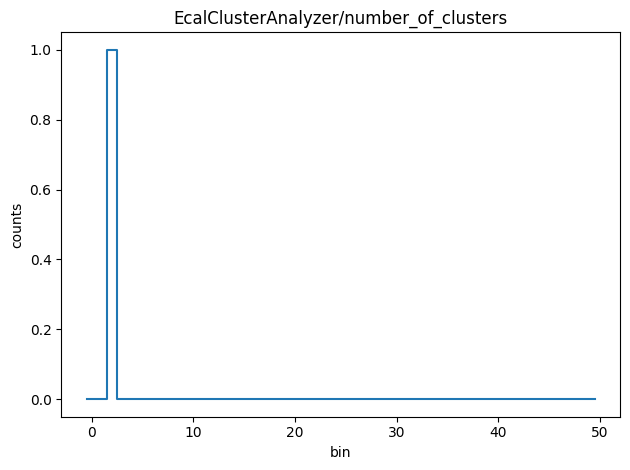

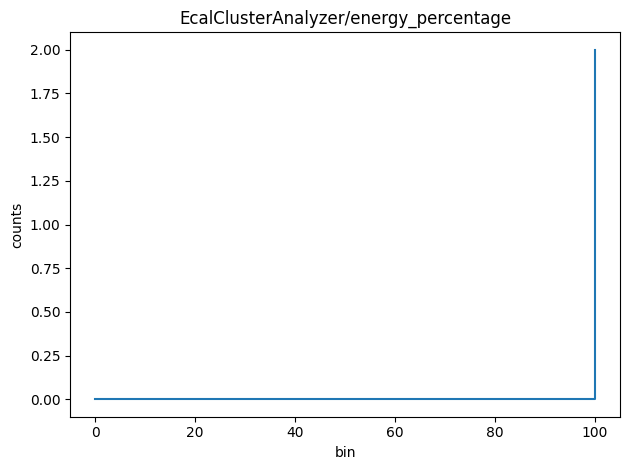

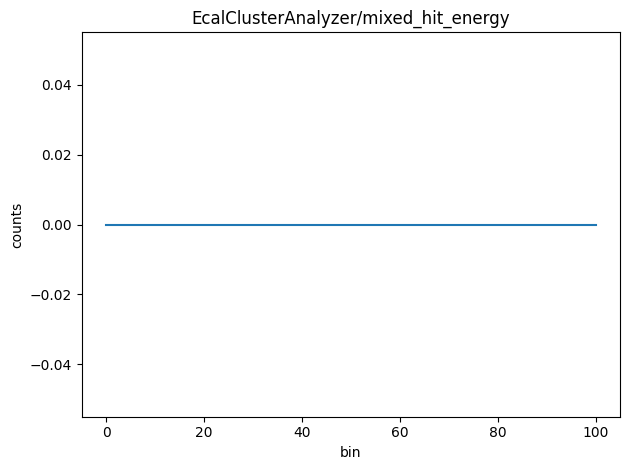

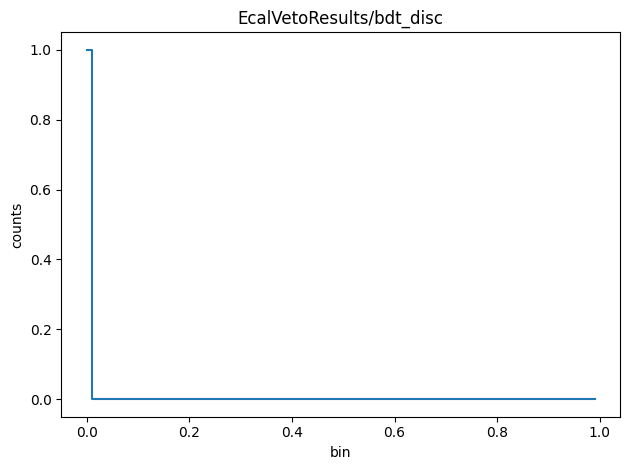

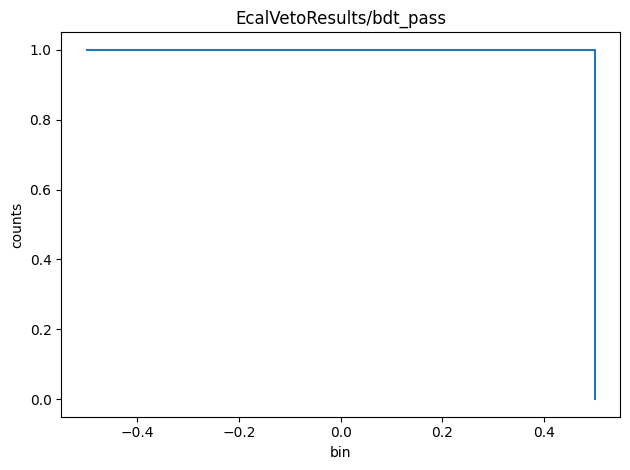

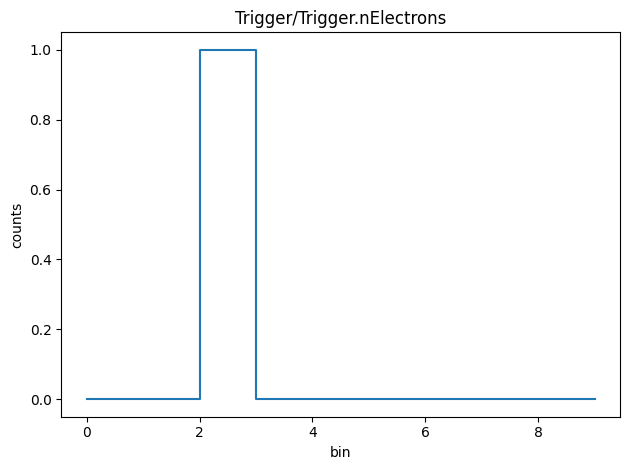

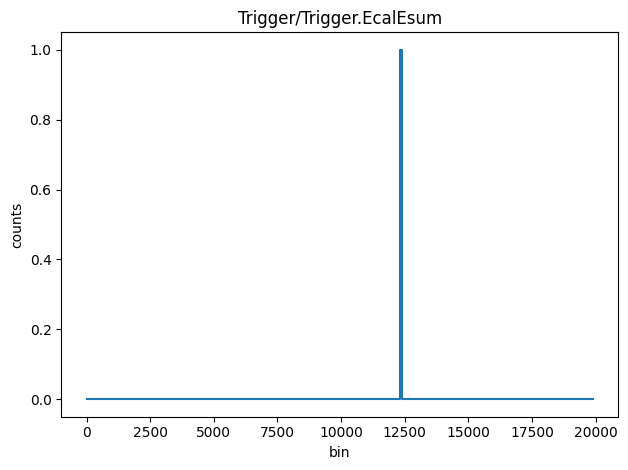

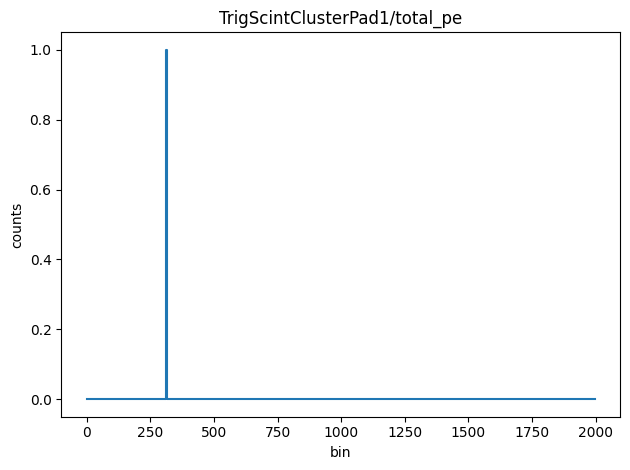

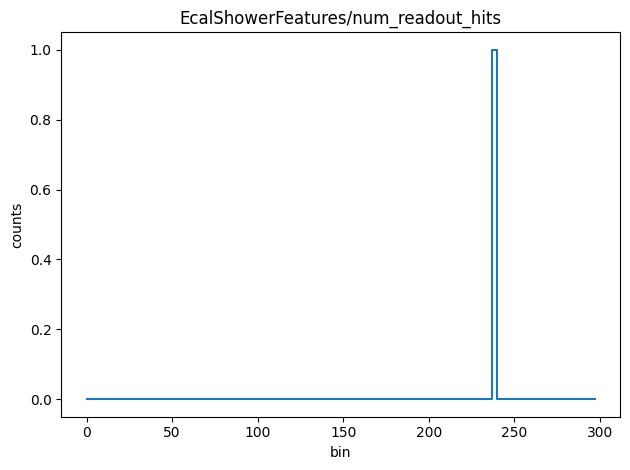

In [7]:
to_plot = [
    "EcalClusterAnalyzer/number_of_clusters",
    "EcalClusterAnalyzer/energy_percentage",
    "EcalClusterAnalyzer/mixed_hit_energy",
    "EcalVetoResults/bdt_disc",
    "EcalVetoResults/bdt_pass",
    "Trigger/Trigger.nElectrons",
    "Trigger/Trigger.EcalEsum",
    "TrigScintClusterPad1/total_pe",
    "EcalShowerFeatures/num_readout_hits",
]

missing = [h for h in to_plot if not exists(h)]
print("Missing:", missing)

for h in to_plot:
    if exists(h):
        plot_hist(h)


In [8]:
keys = sorted(set(k.split(";")[0] for k in f.keys()))
[p for p in keys if p.startswith("EcalVetoResults/")]
[p for p in keys if p.startswith("Trigger/")]
[p for p in keys if p.startswith("TrigScintClusterPad1/")]
[p for p in keys if p.startswith("EcalClusterAnalyzer/")]


['EcalClusterAnalyzer/ancestors',
 'EcalClusterAnalyzer/cluster_RMSX',
 'EcalClusterAnalyzer/cluster_RMSY',
 'EcalClusterAnalyzer/cluster_distance',
 'EcalClusterAnalyzer/correctly_predicted_events',
 'EcalClusterAnalyzer/dE_cl2_vs_cl1',
 'EcalClusterAnalyzer/energy_percentage',
 'EcalClusterAnalyzer/mixed_hit_energy',
 'EcalClusterAnalyzer/number_of_clusters',
 'EcalClusterAnalyzer/number_of_clusters_first_layer',
 'EcalClusterAnalyzer/number_of_clusters_per_layer',
 'EcalClusterAnalyzer/same_ancestor',
 'EcalClusterAnalyzer/sp_clue_distance',
 'EcalClusterAnalyzer/sp_clue_distance_vs_layer',
 'EcalClusterAnalyzer/sp_clue_x_residual',
 'EcalClusterAnalyzer/sp_clue_y_residual',
 'EcalClusterAnalyzer/sp_distance',
 'EcalClusterAnalyzer/sp_ele_distance_vs_purity',
 'EcalClusterAnalyzer/tag0frac_vs_SPdist',
 'EcalClusterAnalyzer/total_energy_vs_hits',
 'EcalClusterAnalyzer/total_energy_vs_purity',
 'EcalClusterAnalyzer/total_rechits_in_event',
 'EcalClusterAnalyzer/unclustered_hits',
 'Ec

#### events.root

In [9]:
with uproot.open("events.root") as f:
    events = f['LDMX_Events'].arrays()

for data in events.fields:
    print(data)

ValueError: cannot produce Awkward Arrays for interpretation AsObjects(AsVector(True, Unknown_ldmx_3a3a_HitData)) because

    ldmx::HitData

instead, try library="np" rather than library="ak" or globally set uproot.default_library

in file events.root
in object /LDMX_Events;1:EcalTrajectoryInfo_overlay/tracking_hit_list_

Open events.root with uproot and examine the contents in the uproot object. Search for keys and search for TTrees and list them. 

In [11]:
# Cell — open events.root and list contents (keys + TTrees)
import uproot

events_path = "events.root"   # adjust if needed
fev = uproot.open(events_path)

print(f"Opened: {events_path} with uproot\n")

# List top-level keys
keys = [k.split(";")[0] for k in fev.keys()]
print(f"Top-level keys ({len(keys)}):")
for k in sorted(set(keys)):
    print("  ", k)

# Find TTrees anywhere in the file
trees = {}
for path, obj in fev.items(recursive=True):
    try:
        if isinstance(obj, uproot.behaviors.TTree.TTree):
            trees[path] = obj
    except Exception:
        pass

print(f"\nFound {len(trees)} TTrees:")
for name, t in trees.items():
    print(f"  - {name}  (entries={t.num_entries}, branches={len(t.keys())})")


Opened: events.root with uproot

Top-level keys (2):
   LDMX_Events
   LDMX_Run

Found 2 TTrees:
  - LDMX_Run;1  (entries=1, branches=18)
  - LDMX_Events;1  (entries=1, branches=1292)


In [ ]:
# Cell — summarize "collections" (top-level branch prefixes) and how many leaf branches each has
import pandas as pd

all_branches = list(main_tree.keys())

def top_prefix(b):
    return b.split("/")[0] if "/" in b else b

prefix_counts = pd.Series([top_prefix(b) for b in all_branches]).value_counts()
df_collections = prefix_counts.rename_axis("collection").reset_index(name="n_branches")

print(f"Collections: {len(df_collections)}")
display(df_collections.head(40))

# If you want: save for quick searching
df_collections.to_csv("events_collections_index.csv", index=False)
print("Wrote events_collections_index.csv")


Collections: 66


,collection,n_branches
0,EcalVeto_overlay,56
1,EcalPnetVeto_overlay,56
2,HcalVeto_overlay,28
3,trigScintDigisPad1_overlay,27
4,trigScintDigisPad2_overlay,27
5,trigScintDigisPad3_overlay,27
6,SimParticles_ecal_pn,25
7,PFTruth_overlay,25
8,HcalSimHits_ecal_pn,24
9,EcalSimHits_ecal_pn,24


Wrote events_collections_index.csv


In [ ]:
# Cell — quick helper: show all branches for a given collection prefix
def list_collection(prefix, max_show=120):
    matches = [b for b in all_branches if b == prefix or b.startswith(prefix + "/")]
    print(f"{prefix}: {len(matches)} branches")
    for b in matches[:max_show]:
        print("  ", b)
    if len(matches) > max_show:
        print(f"  ... ({len(matches)-max_show} more)")
    return matches

# Example: inspect key collections you mentioned
list_collection("EventHeader")
list_collection("SimParticles_ecal_pn", max_show=80)
list_collection("RecoilSimHits_ecal_pn", max_show=80)


EventHeader: 17 branches
   EventHeader
   EventHeader/event_number_
   EventHeader/run_
   EventHeader/timestamp_
   EventHeader/timestamp_/timestamp_.fSec
   EventHeader/timestamp_/timestamp_.fNanoSec
   EventHeader/weight_
   EventHeader/is_real_data_
   EventHeader/int_parameters_
   EventHeader/int_parameters_/int_parameters_.first
   EventHeader/int_parameters_/int_parameters_.second
   EventHeader/float_parameters_
   EventHeader/float_parameters_/float_parameters_.first
   EventHeader/float_parameters_/float_parameters_.second
   EventHeader/string_parameters_
   EventHeader/string_parameters_/string_parameters_.first
   EventHeader/string_parameters_/string_parameters_.second
SimParticles_ecal_pn: 25 branches
   SimParticles_ecal_pn
   SimParticles_ecal_pn/SimParticles_ecal_pn.first
   SimParticles_ecal_pn/SimParticles_ecal_pn.second.energy_
   SimParticles_ecal_pn/SimParticles_ecal_pn.second.pdg_id_
   SimParticles_ecal_pn/SimParticles_ecal_pn.second.gen_status_
   SimParticl

['RecoilSimHits_ecal_pn',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.id_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.layer_id_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.module_id_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.edep_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.time_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.px_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.py_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.pz_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.energy_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.x_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.y_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.z_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.path_length_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.track_id_',
 'RecoilSimHits_ecal_pn/RecoilSimHits_ecal_pn.pdg_id_']

In [ ]:
# Cell — load EventHeader scalars into a one-row DataFrame
import awkward as ak

eh_branches = [b for b in all_branches if b.startswith("EventHeader/") and b.count("/") <= 2]
eh = main_tree.arrays(eh_branches, library="ak")

row = {}
for b in eh_branches:
    # Some branches are nested structs; keep only scalar-ish leaves that convert cleanly
    try:
        row[b] = ak.to_list(eh[b])[0]
    except Exception:
        pass

df_eventheader = pd.DataFrame([row])
display(df_eventheader.T.rename(columns={0: "value"}))


,value
EventHeader/event_number_,1
EventHeader/run_,1
EventHeader/timestamp_,"{'timestamp_.fSec': 1770046255, 'timestamp_.fN..."
EventHeader/timestamp_/timestamp_.fSec,1770046255
EventHeader/timestamp_/timestamp_.fNanoSec,101887000
EventHeader/weight_,0.001818
EventHeader/is_real_data_,False
EventHeader/int_parameters_,"{'int_parameters_.first': [], 'int_parameters_..."
EventHeader/int_parameters_/int_parameters_.first,[]
EventHeader/int_parameters_/int_parameters_.second,[]


In [ ]:
# Cell — detect "object collections" that use the pattern <Collection>/<Collection>.<field>
# (common in your file: SimParticles_ecal_pn/SimParticles_ecal_pn.first, etc.)
import re

pat = re.compile(r"^(?P<coll>[^/]+)/(?P=coll)\.(?P<field>.+)$")

coll_fields = {}
for b in all_branches:
    m = pat.match(b)
    if m:
        coll_fields.setdefault(m.group("coll"), []).append(m.group("field"))

df_objcoll = (
    pd.DataFrame(
        [{"collection": c, "n_fields": len(f), "fields_preview": ", ".join(sorted(f)[:12])}
         for c, f in sorted(coll_fields.items())]
    )
    .sort_values("n_fields", ascending=False)
)

print(f"Detected {len(df_objcoll)} object-collections of the form Coll/Coll.<field>")
display(df_objcoll.head(40))


Detected 56 object-collections of the form Coll/Coll.<field>


,collection,n_fields,fields_preview
54,trigScintDigisPad2_overlay,26,"amplitude_, amplitude_neg_, amplitude_pos_, ba..."
55,trigScintDigisPad3_overlay,26,"amplitude_, amplitude_neg_, amplitude_pos_, ba..."
53,trigScintDigisPad1_overlay,26,"amplitude_, amplitude_neg_, amplitude_pos_, ba..."
19,PFTruth_overlay,24,"first, second.charge_, second.daughters_, seco..."
27,SimParticles_ecal_pn,24,"first, second.charge_, second.daughters_, seco..."
6,EcalSimHitsOverlay_overlay,23,"edep_, edep_contribs_, id_, incident_id_contri..."
13,HcalSimHits_ecal_pn,23,"edep_, edep_contribs_, id_, incident_id_contri..."
7,EcalSimHits_ecal_pn,23,"edep_, edep_contribs_, id_, incident_id_contri..."
47,TriggerPad3SimHitsOverlay_overlay,23,"edep_, edep_contribs_, id_, incident_id_contri..."
36,TargetSimHitsOverlay_overlay,23,"edep_, edep_contribs_, id_, incident_id_contri..."


In [ ]:
# Cell — extractor that cannot crash on jagged/nested jagged fields
import awkward as ak
import numpy as np
import pandas as pd

def _is_scalar(x):
    # scalar if not list-like at all
    t = str(ak.type(x)).lower()
    return ("var *" not in t) and ("fixed *" not in t) and ("list" not in t)

def _is_flat_numeric_vector(x):
    # flat numeric vector if one-dimensional and numeric
    t = str(ak.type(x)).lower()
    numeric = any(s in t for s in ["int", "uint", "float", "double"])
    # flat vector has list nesting but not nested lists:
    # allow "var * <num>" but reject "var * var * <num>"
    flat = ("var *" in t or "fixed *" in t) and ("var * var *" not in t) and ("fixed * fixed *" not in t) and ("var * fixed *" not in t) and ("fixed * var *" not in t)
    return numeric and flat

def extract_object_collection_ultrasafe(tree, coll, fields=None, max_fields=None, verbose=True):
    """
    Extract branches like coll/coll.<field> to a pandas DataFrame (rows = items in event 0)
    Rules:
      - scalars -> repeated or single value
      - flat numeric vectors -> numpy 1D
      - anything jagged/nested/records -> python lists (object dtype)
    """
    if fields is None:
        fields = sorted(coll_fields.get(coll, []))
    if not fields:
        raise ValueError(f"No fields found for collection '{coll}'.")
    if max_fields is not None:
        fields = fields[:max_fields]

    branches = [f"{coll}/{coll}.{f}" for f in fields]
    arr = tree.arrays(branches, library="ak")

    out = {}
    kept_as_list = []

    # Determine "n_items" from the first non-scalar field (event 0)
    n_items = None
    for f in fields:
        a0 = arr[f"{coll}/{coll}.{f}"][0]
        if not _is_scalar(a0):
            try:
                n_items = len(a0)
                break
            except Exception:
                pass

    for f in fields:
        a0 = arr[f"{coll}/{coll}.{f}"][0]  # event 0

        if _is_scalar(a0):
            # make it a column with 1 value (or repeat if we know n_items)
            v = ak.to_list(a0)
            if n_items is None:
                out[f] = [v]
            else:
                out[f] = [v] * n_items
        elif _is_flat_numeric_vector(a0):
            # safe to convert to numpy
            out[f] = np.asarray(ak.to_list(a0))
        else:
            # jagged/nested jagged/record -> keep python list objects
            out[f] = ak.to_list(a0)
            kept_as_list.append((f, str(ak.type(a0))))

    df = pd.DataFrame(out)

    if verbose and kept_as_list:
        print(f"[{coll}] Kept {len(kept_as_list)} fields as lists (jagged/nested/record). Examples:")
        for f, t in kept_as_list[:12]:
            print("  ", f, "->", t)
        if len(kept_as_list) > 12:
            print(f"  ... ({len(kept_as_list)-12} more)")

    return df


In [ ]:
# Cell — SimParticles (won't crash)
df_sim = extract_object_collection_ultrasafe(main_tree, "SimParticles_ecal_pn")
print(df_sim.shape)
display(df_sim.head(30))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (95,) + inhomogeneous part.

In [ ]:
# Cell — RecoilSimHits (won't crash)
df_recoil = extract_object_collection_ultrasafe(main_tree, "RecoilSimHits_ecal_pn")
print(df_recoil.shape)
display(df_recoil.head(30))


In [ ]:
# Cell — extract SimParticles_ecal_pn into a flat pandas table (one row per particle)
import awkward as ak
import numpy as np
import pandas as pd

def extract_object_collection(tree, coll, max_fields=None):
    """Extracts branches like coll/coll.<field> into a pandas DataFrame (one row per item)."""
    fields = sorted(coll_fields.get(coll, []))
    if not fields:
        raise ValueError(f"No fields found for collection '{coll}'.")
    if max_fields is not None:
        fields = fields[:max_fields]
    branches = [f"{coll}/{coll}.{f}" for f in fields]

    arr = tree.arrays(branches, library="ak")

    # Each field is typically jagged over items in the event (you have only 1 event)
    out = {}
    n = None
    for f in fields:
        a = arr[f"{coll}/{coll}.{f}"]
        # take event 0
        a0 = a[0]
        out[f] = ak.to_numpy(a0) if not isinstance(a0, (int, float, np.number)) else np.array([a0])
        if n is None and hasattr(a0, "__len__"):
            n = len(a0)

    df = pd.DataFrame(out)
    return df

df_sim = extract_object_collection(main_tree, "SimParticles_ecal_pn")
print(df_sim.shape)
display(df_sim.head(20))


ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-51/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

In [ ]:
# Cell — plot multiplicities if we built df_mult
import matplotlib.pyplot as plt

if "df_mult" in globals():
    for c in df_mult.columns[:6]:
        plt.figure()
        plt.hist(df_mult[c].dropna(), bins=80)
        plt.title(c)
        plt.xlabel(c)
        plt.ylabel("count")
        plt.yscale("log")
        plt.show()
